#**Riddle Website Auto-generator**

### Overview: Calling all **riddle enthusiasts!** You've arrived at the perfect destination. The project aims to automate the generation of a Riddle platform, where you can find a wide variety of randomly generated riddle questions that make sense when complemented with corresponding answer images. With a simple prompt, you can unleash the magic, engage your problem-solving skills, and embark on an exhilarating journey of riddle-solving. Get ready to prompt, discover, and unravel the enigma!




### **Sources for this project:**
###For text generation, the ChatGPT API from RapidAPI (https://rapidapi.com/Glavier/api/chatgpt53/details) is utilized.
### Additionally, for image generation, the stable diffusion pipeline with Stable Diffusion version 1.4 (https://huggingface.co/CompVis/stable-diffusion-v1-4) is employed.

### **Text Generation using chatGPT API**

### The project involves dividing the prompt into two parts. The first part is a simple prompt provided by the user, where they specify the number of questions they want on their website. This user prompt is then incorporated into the "true" prompt, which was developed and has already undergone a series of refinements to ensure the best and most accurate output received from the API.



**User's Prompt:**

In [ ]:
import re
import string
user_input = ""

print("Riddler: Hellooo. Welcome to the Riddle Website Auto-generator. I'm Riddler, your AI assistant to help you to generate a riddle website automatically!")
user_input = input('User: ')

while True:
  try:

    while (int(re.findall(r'\d+', user_input)[0]) <2 or int(re.findall(r'\d+', user_input)[0]) >=9) or (len(re.findall(r'\d+', user_input)) !=1) :
      if int(re.findall(r'\d+', user_input)[0]) >=9:
        print("Riddler: Sorry, 8 questions are the limit for now :(") #put a limit to the questions in ordre to control the total executing time of this program (generating images takes a lot of time!)
      print("Riddler: Please enter the number of questions that you would like your website to have. 2 is the minimum.")
      user_input = input('User: ')
    break
  except:
    print("Riddler: Please enter the number of questions that you would like your website to have. 2 is the minimum.")
    user_input = input('User: ')

number = int(re.findall(r'\d+', user_input)[0])
print(f"Riddler: Sure! {number} questions, it is!")


Riddler: Hellooo. Welcome to the Riddle Website Auto-generator. I'm Riddler, your AI assistant to help you to generate a riddle website automatically!
User: hi. Please generate for me 8 riddle questions, please.
Riddler: Sure! 8 questions, it is!


### The "true" prompt is a refined description of the website's layout in English, written from the users' perspective. It incorporates instructions for generating riddle questions and answers, as well as details about the functionality of elements like buttons and the underlying JavaScript code that supports them. This comprehensive prompt ensures that the generated output aligns with the user's expectations and provides a cohesive and interactive experience on the website.

**True prompt:**

In [ ]:
true_prompt = """Perform 2 tasks: {1. provide html coding for a website page where: Upon accessing the webpage, the user is greeted with the page title "Brain Teaser Website." This suggests that the website is dedicated to brain teasers.

The main heading of the page, "Welcome to the Brain Teaser Website," immediately captures the user's attention and reinforces the purpose of the website.

Below the main heading, there are """+str(number)+""" brain teaser sections presented in a structured format. Each brain teaser section includes a title indicating the number of the brain teaser. For example, the first section is labeled "Brain Teaser 1" and the second section is labeled "Brain Teaser 2."

Within each brain teaser section, there is a description of the brain teaser itself. The description presents a riddle-like question, inviting the user to think and solve the brain teaser. For the Brain Teaser 1, please generate a brain teaser question where the answer will only make sense when the user sees the picture of it.

Below the brain teaser question, there is a button labeled "Show Answer." that users can click to reveal the answer. Below the button, the image are set to be initially hidden using the "display:none;" inline style. Below the image, paragraph are set to be initially hidden using the "display:none;" inline style . Clicking the button triggers the display of a hidden picture and a hidden paragraph that contains the answer. In the Brain Teaser 1 section, the revealed picture is the picture from the generated question and the revealed answer is the answer from the generated question.

The Brain Teaser 2 section follows the same structure as the Brain Teaser 1, with a different question and answer. For the Brain Teaser 2, please generate a different brain teaser question where the answer will only make sense when the user sees the picture of it. The picture and the answer from the generated question is displayed by clicking the "Show Answer" button."""

number = number - 2
current = 3

while number != 0:
  true_prompt = true_prompt + """The Brain Teaser """+str(current)+""" section follows the same structure as the Brain Teaser """+str(current-1)+""", with a different question and answer. For the Brain Teaser """+str(current)+""", please generate a different brain teaser question where the answer will only make sense when the user sees the picture of it. The picture and the answer from the generated question is displayed by clicking the "Show Answer" button."""
  current+=1
  number-=1

true_prompt = true_prompt + """}

{2. The html coding employs an external JavaScript file, "script.js,". Provide .js coding for "script.js". The coding starts by selecting all the buttons on the webpage. For each button selected, the script sets up a click event listener.This means that when a user clicks on any of these buttons, a specific action will be triggered.

When a button is clicked, the script executes a function that performs the following actions:

  1. Display hidden picture below the button
  2. Display hidden answer below the picture}"""


print(true_prompt)

Perform 2 tasks: {1. provide html coding for a website page where: Upon accessing the webpage, the user is greeted with the page title "Brain Teaser Website." This suggests that the website is dedicated to brain teasers.

The main heading of the page, "Welcome to the Brain Teaser Website," immediately captures the user's attention and reinforces the purpose of the website.

Below the main heading, there are 8 brain teaser sections presented in a structured format. Each brain teaser section includes a title indicating the number of the brain teaser. For example, the first section is labeled "Brain Teaser 1" and the second section is labeled "Brain Teaser 2."

Within each brain teaser section, there is a description of the brain teaser itself. The description presents a riddle-like question, inviting the user to think and solve the brain teaser. For the Brain Teaser 1, please generate a brain teaser question where the answer will only make sense when the user sees the picture of it.

Bel

### Throughout the refinement process, it is discovered that even small changes in wording can significantly impact the expected outcome and the functionality of the system. For example (refer to the picture below), using the word "Following" to indicate the position of an element can yield variable results, such as it will be placed at the bottom or on the right/left side. In the following example, the button is positioned on the right side. However, for the button to function correctly, it should be placed at the bottom instead of being side by side with the other elements (this is due to the syntax used in the generated JavaScript code).

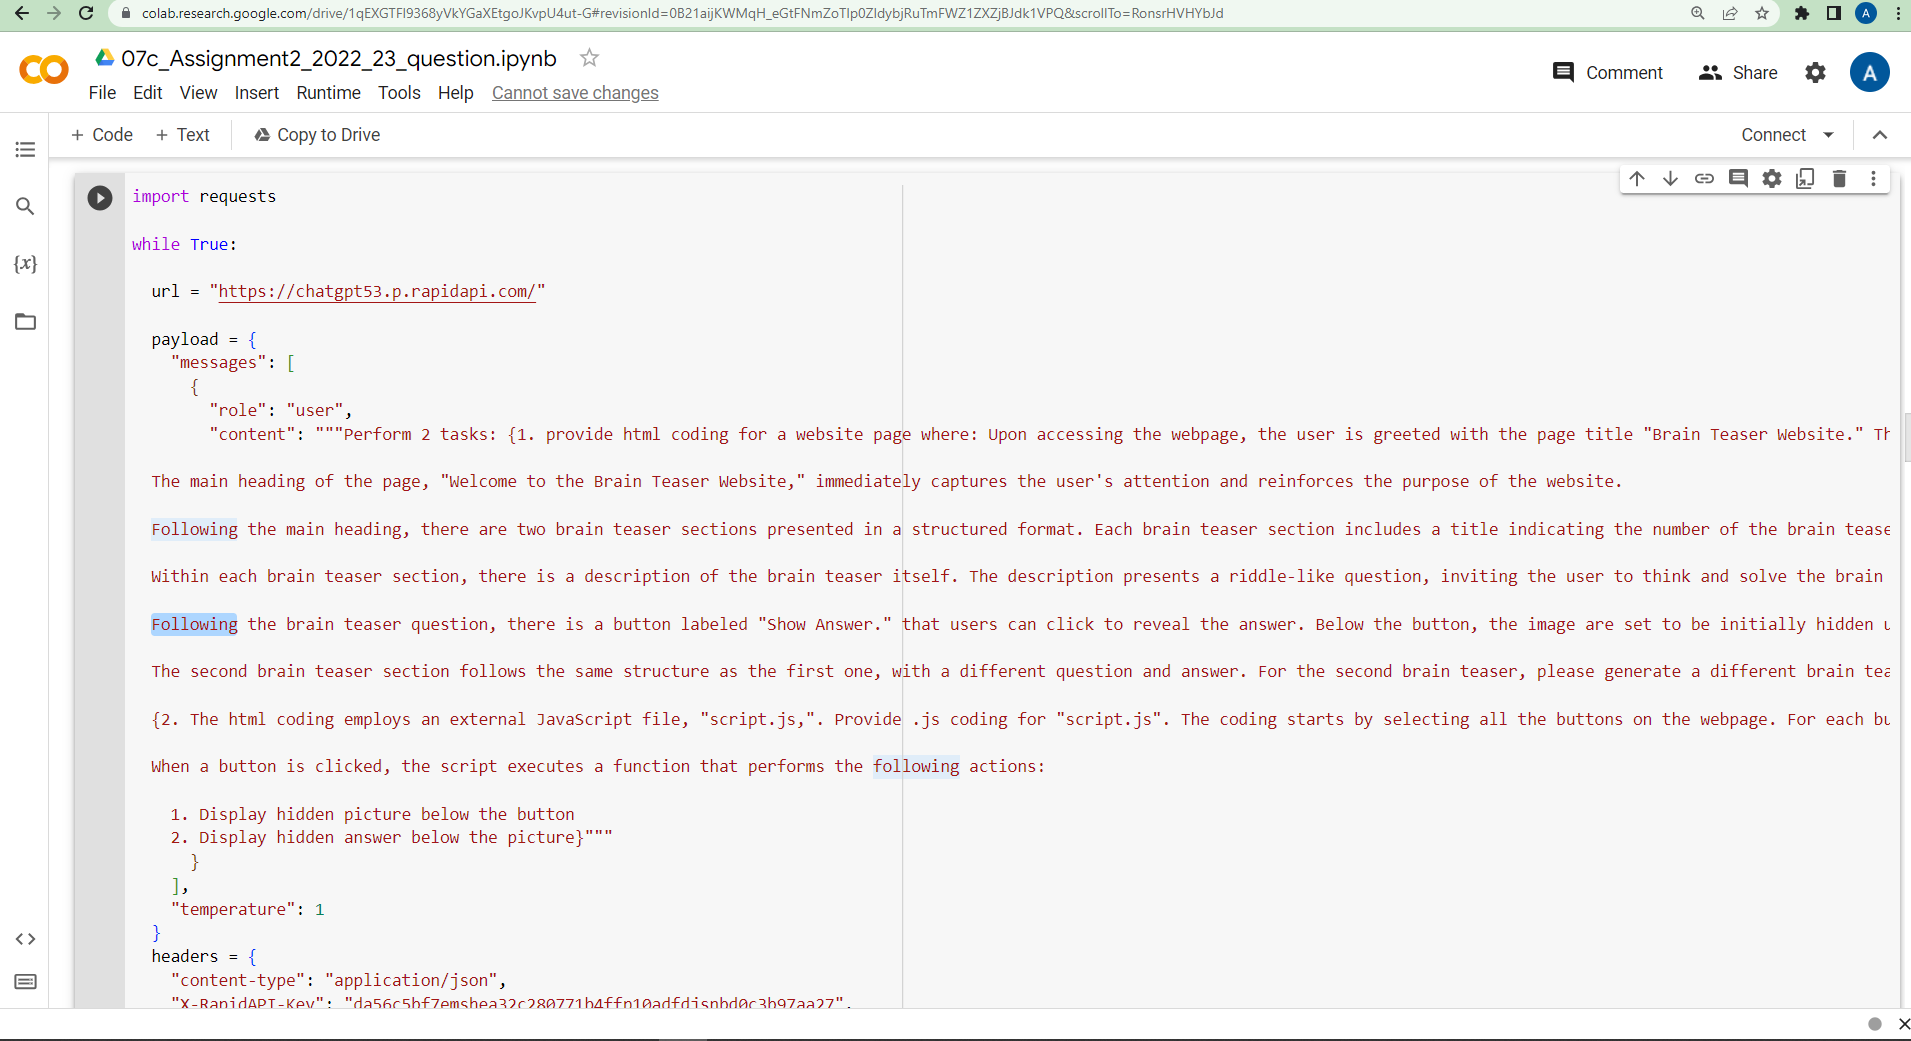

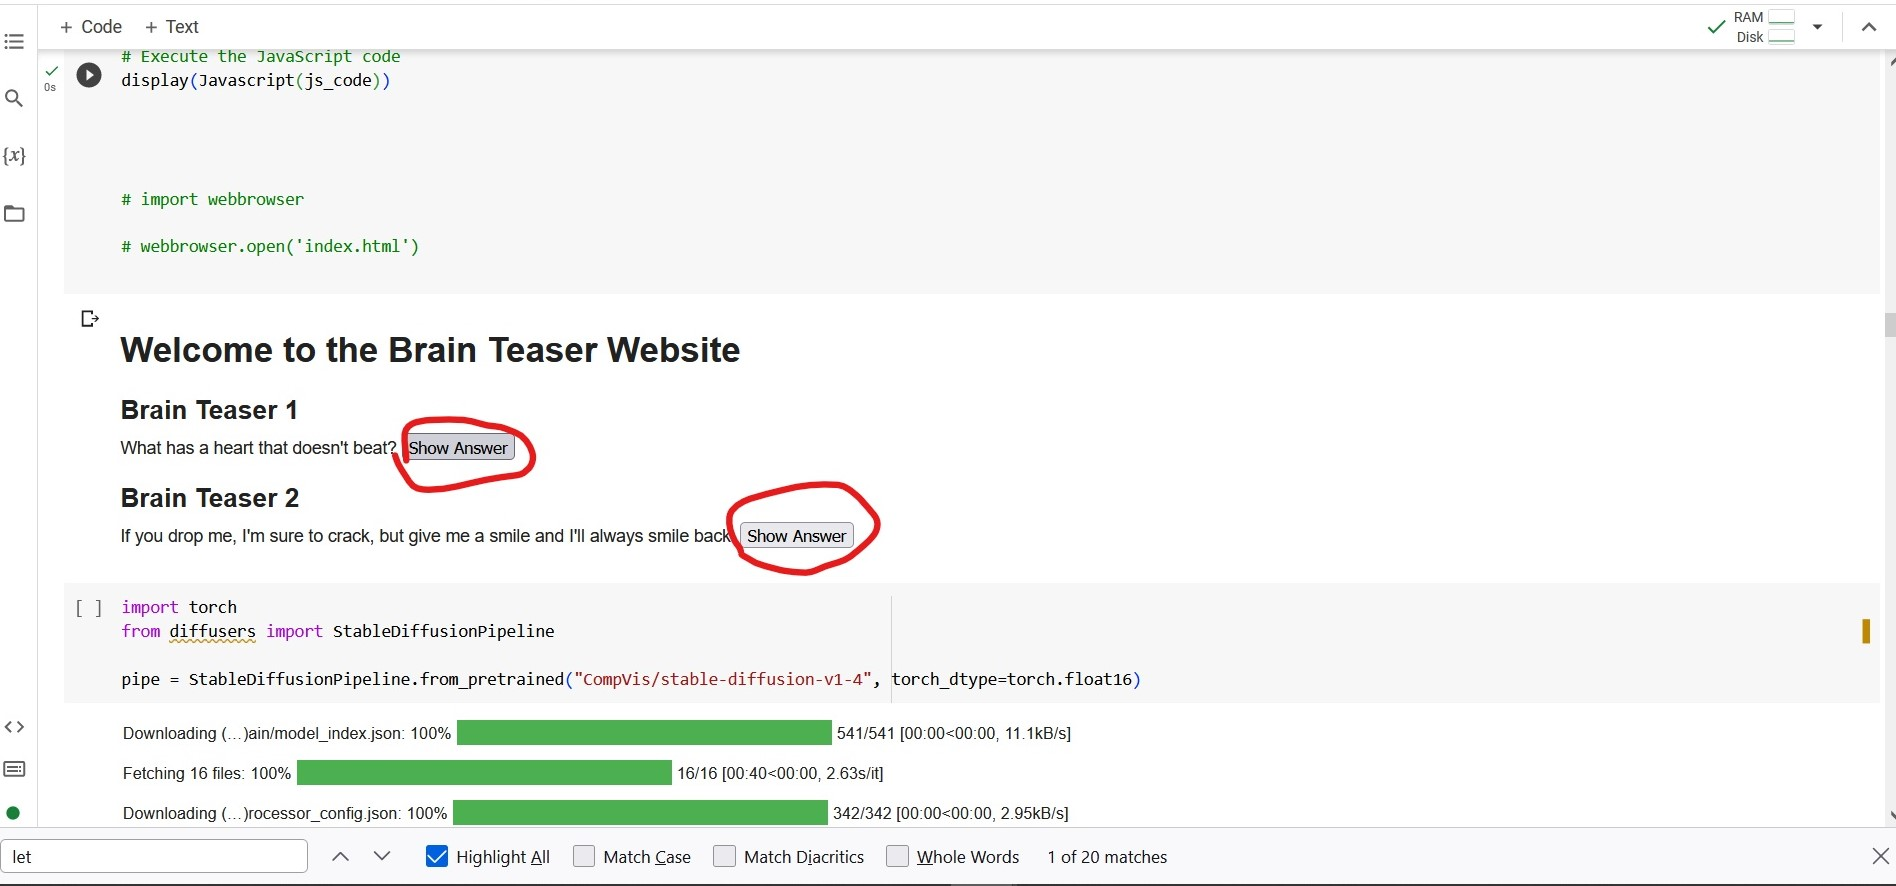

### When the prompt was revised with a more specific instruction, for example by using word 'Below' instead of 'Following', the output will be consistent with what we expected it to be (even when we prompt the same instruction over and over again). This improvement is attributed to the use of a less ambiguous word in the prompt.

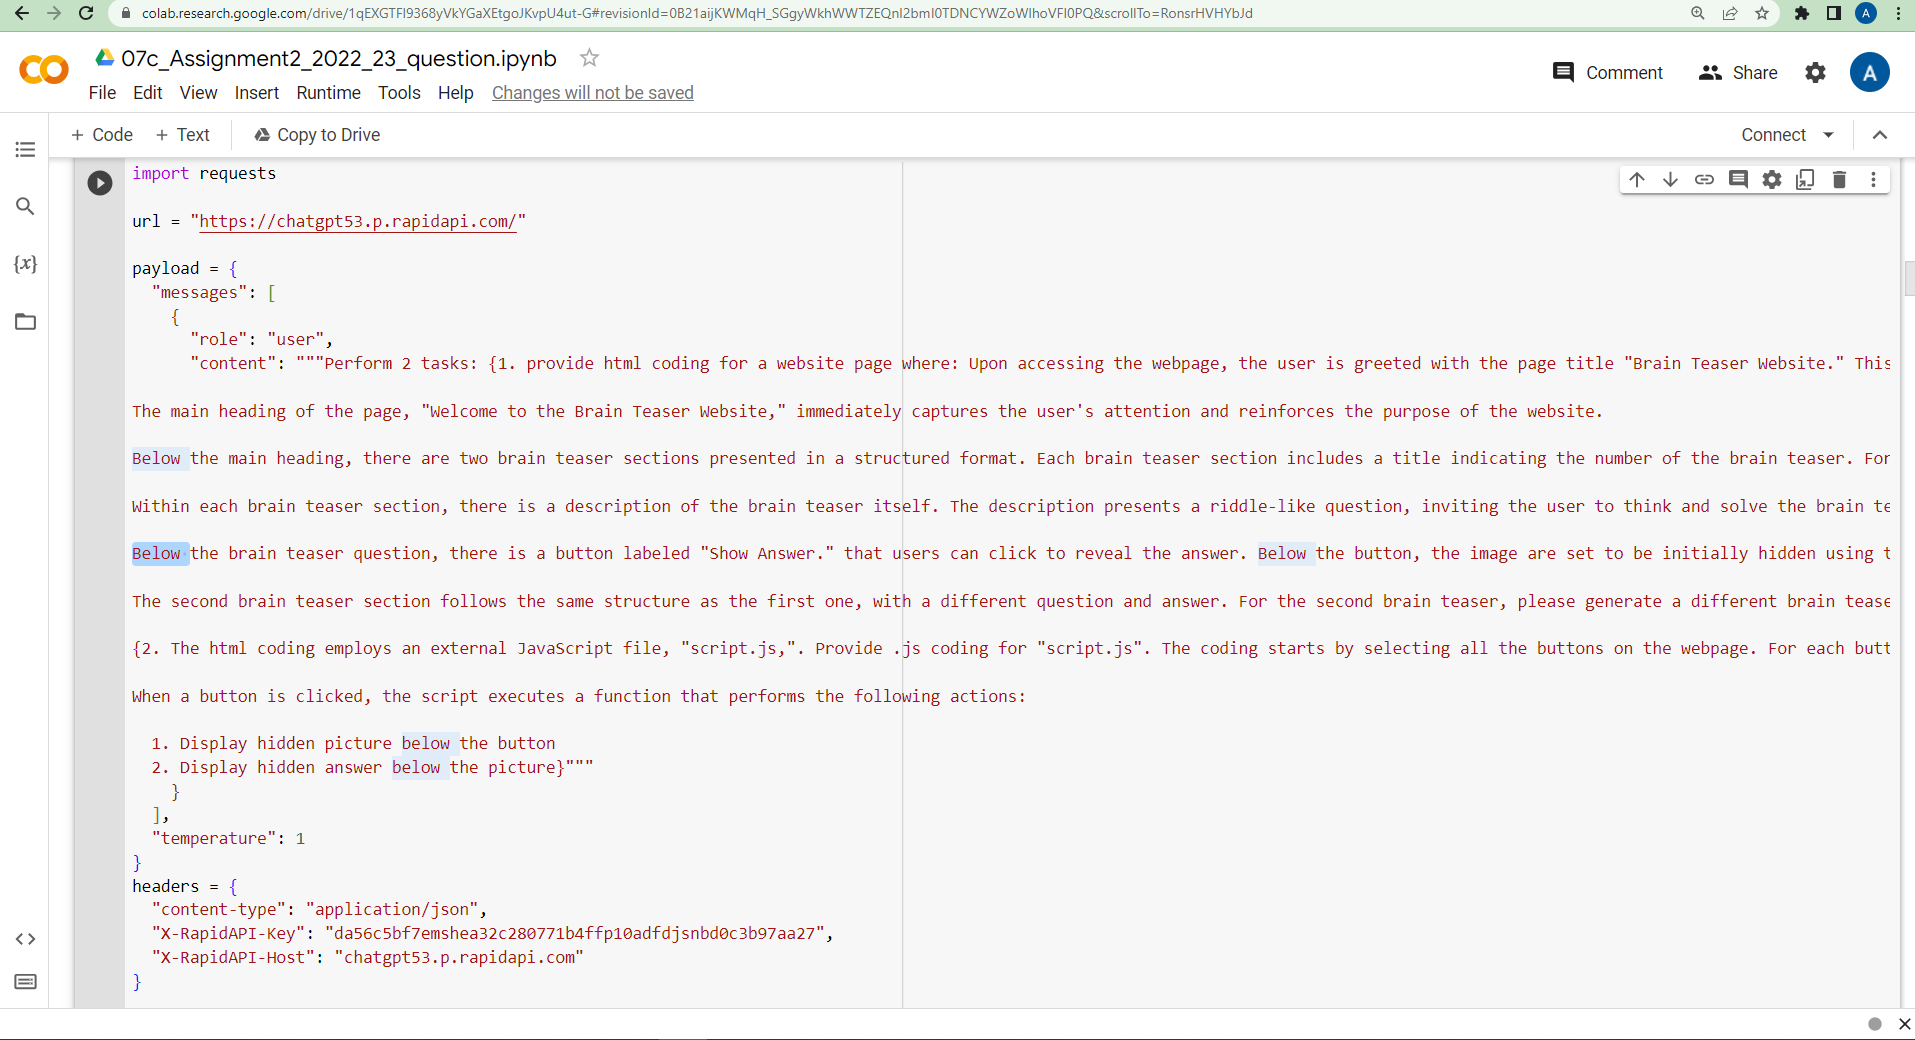

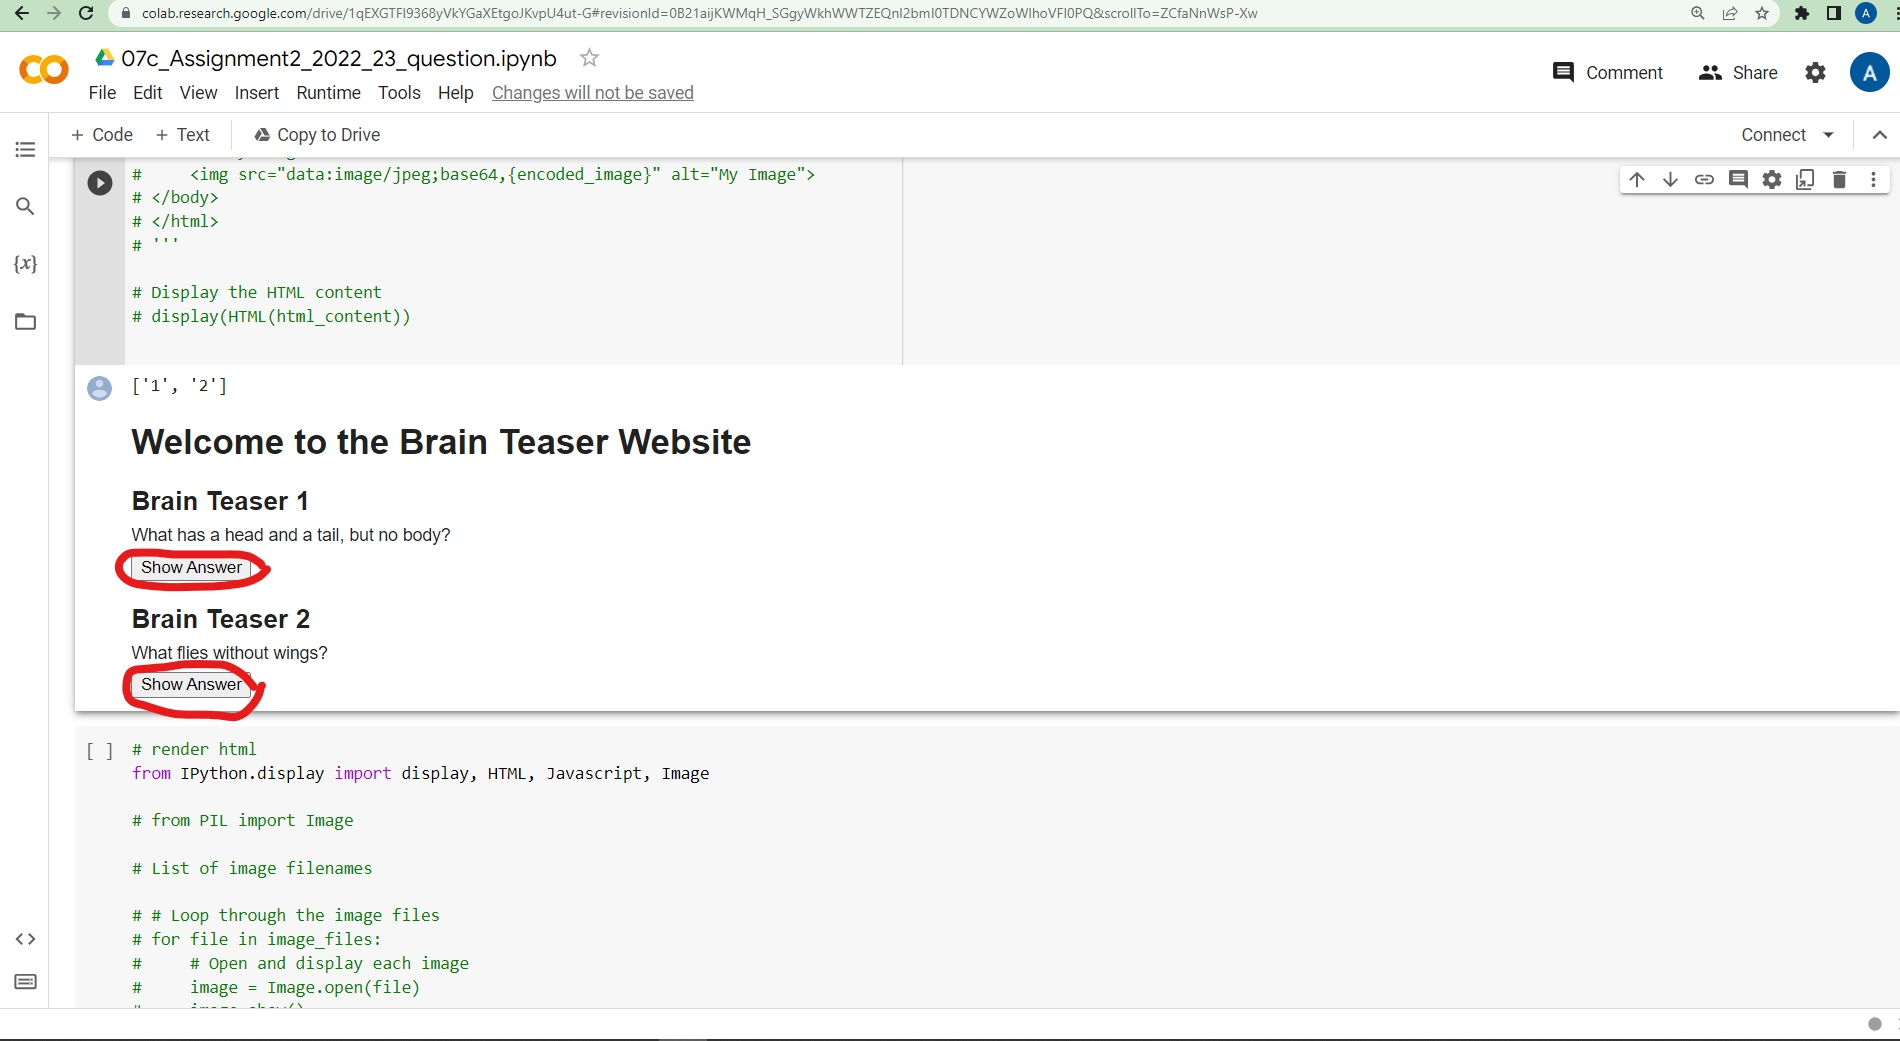

###The request to chatGPT API then was made based on the "true" prompt constructed earlier.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import requests

while True:

	url = "https://chatgpt53.p.rapidapi.com/"


	payload = {
		"messages": [
			{
				"role": "user",
				"content": true_prompt
			}
		],
		"temperature": 1
	}
	headers = {
		"content-type": "application/json",
		"X-RapidAPI-Key": "da56c5bf7emshea32c280771b4ffp10adfdjsnbd0c3b97aa27",
		"X-RapidAPI-Host": "chatgpt53.p.rapidapi.com"
	}

	response = requests.post(url, json=payload, headers=headers)

	response_all = response.json()
	response_content = response_all["choices"][0]["message"]["content"]

	print(response_content)

	soup = BeautifulSoup(response_content, "html.parser")

	if len(soup.select("p[style='display:none;']")) != 0 :
		break





// script.js

// selecting all the buttons on the webpage
var buttons = document.querySelectorAll('button');

// setting up a click event listener for each button
for (var i = 0; i < buttons.length; i++) {
  buttons[i].addEventListener('click', function() {
    // displaying hidden picture below the button
    var picture = this.nextElementSibling;
    picture.style.display = "block";

    // displaying hidden answer below the picture
    var answer = picture.nextElementSibling;
    answer.style.display = "block";
  });
}
// script.js

// Select all 'Show Answer' buttons
const buttons = document.querySelectorAll('button');

// Add click event listener to each button
buttons.forEach(button => {
  button.addEventListener('click', () => {
    // Select hidden image and answer
    const image = button.nextElementSibling;
    const answer = image.nextElementSibling;
    
    // Display the hidden image and answer
    image.style.display = 'block';
    answer.style.display = 'block';
  });
}

### Then, a light postprocessing step was performed, which involved segregating the HTML and JavaScript codes into separate files.

**HTML:**

In [ ]:
#Postprocessing after getting code from chatgpt

import re


# Regular expression pattern to match the HTML code
pattern = r"(?s)(<!DOCTYPE html>.*?</html>)"

# Find the first match of the HTML code
match = re.search(pattern, response_content)


if match:
    html_code = match.group(1)
    print(html_code)
    ####
    soup = BeautifulSoup(html_code, "html.parser")

    image_element = soup.select("p[style='display:none;']")

    image_name = []

    for i in image_element:
      image_name.append(i.text.strip())


    response_content = response_content.replace(html_code,'')


<!DOCTYPE html>
<html>
<head>
	<title>Brain Teaser Website</title>
	<script type="text/javascript" src="script.js"></script>
</head>
<body>
	<h1>Welcome to the Brain Teaser Website</h1>
	<div>
		<h2>Brain Teaser 1</h2>
		<p>What has a neck but no head? Click the "Show Answer" button to reveal the answer.</p>
		<button class="btn">Show Answer</button>
		<img src="image1.jpg" style="display:none;">
		<p style="display:none;">A bottle</p>
	</div>
	<div>
		<h2>Brain Teaser 2</h2>
		<p>What can go up and down without moving? Click the "Show Answer" button to reveal the answer.</p>
		<button class="btn">Show Answer</button>
		<img src="image2.jpg" style="display:none;">
		<p style="display:none;">A staircase</p>
	</div>
	<div>
		<h2>Brain Teaser 3</h2>
		<p>What has one eye but cannot see? Click the "Show Answer" button to reveal the answer.</p>
		<button class="btn">Show Answer</button>
		<img src="image3.jpg" style="display:none;">
		<p style="display:none;">A needle</p>
	</div>
	<div>
		<

**Javascript:**

In [ ]:
import re

# Split the text based on the keywords used in js to declare variables
keywords = ['var','let','const']



pattern = r'({})'.format('|'.join(keywords))

# Split the text only on the first occurrence of the keyword
js_code = re.split(pattern, response_content,1)




# Print the split parts
js_code = ''.join(js_code[-2:])

def replace_last(string, old_substring, new_substring):
    last_index = string.rfind(old_substring)

    if last_index != -1:
        return string[:last_index] + new_substring + string[last_index + len(old_substring):]

    return string


while True:
  if (js_code[-1] != '}' and js_code[-1] != ')' and js_code[-1]!= ']'):
    print(js_code[-1])
    js_code = replace_last(js_code,js_code[-1],'')
  else:
    break
print(js_code)

;
const buttons = document.querySelectorAll('.btn');

buttons.forEach((button) => {
	button.addEventListener('click', () => {
		const image = button.nextElementSibling;
		const answer = image.nextElementSibling;

		image.style.display = 'block';
		answer.style.display = 'block';

		button.style.display = 'none';
	});
})


**Inserting extracted scripts into separate files:**

In [ ]:
#insert html and .js into file

filename = 'index.html'

with open(filename, 'w') as file:
    file.write(html_code)


print(f'Successfully saved HTML file: {filename}')

filename = 'script.js'

with open(filename, 'w') as file:
    file.write(js_code)


print(f'Successfully saved HTML file: {filename}')

Successfully saved HTML file: index.html
Successfully saved HTML file: script.js


### The images corresponding to the answers of the riddles are generated using a pre-trained model Stable Diffusion version 1.4. By leveraging the capabilities of Stable Diffusion, the project ensures that the generated images effectively complement the riddles and enhance the overall user experience on the website.

In [ ]:
!nvidia-smi

Thu Jun 22 15:12:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    33W /  70W |   5585MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
pipe = pipe.to("cuda")

In [ ]:
import re

for i in image_name:

  i_cleaned = re.sub(r"[^\w\s]", ' ', i)
  i_cleaned = re.sub(r"The answer is",'',i_cleaned)
  i_cleaned = re.sub(r"Answer",'',i_cleaned)

  image = pipe(i_cleaned).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# save image
  image.save(f"{i_cleaned.replace(' ','')}.jpg")



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### The website is rendered using the IPython library, which provides a convenient way to display and interact with the generated content.

In [ ]:
import time
time.sleep(15) # this is to provide some time buffer for the images that was previous generated to finish uploaded to the current runtime
               # You may comment out the code if it is not needed.


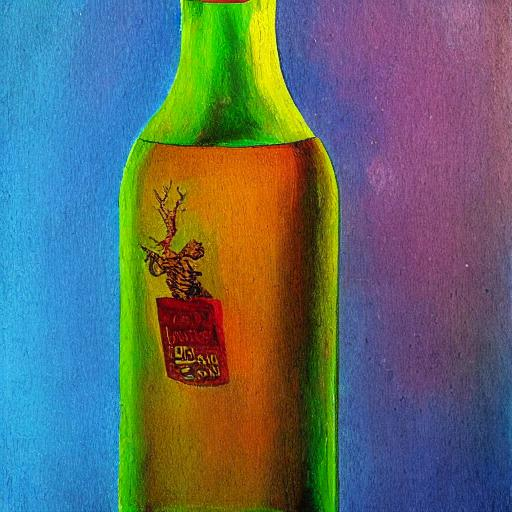
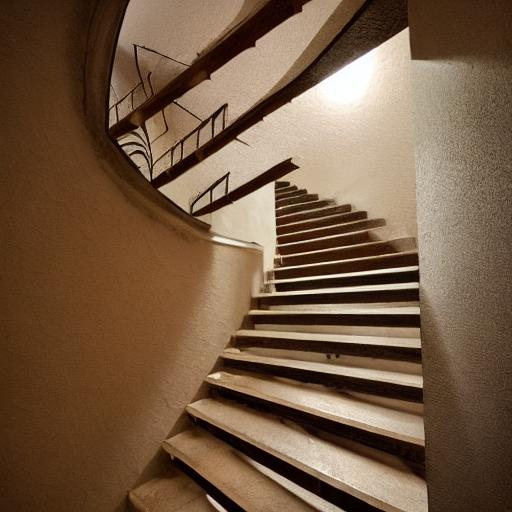
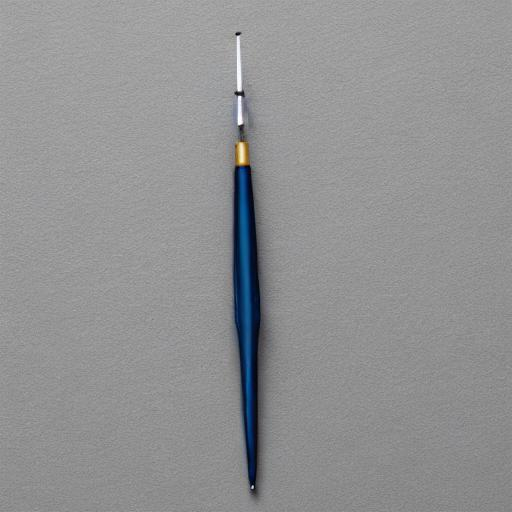
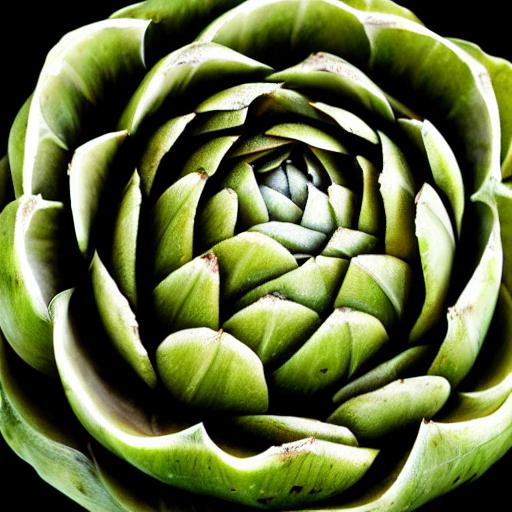
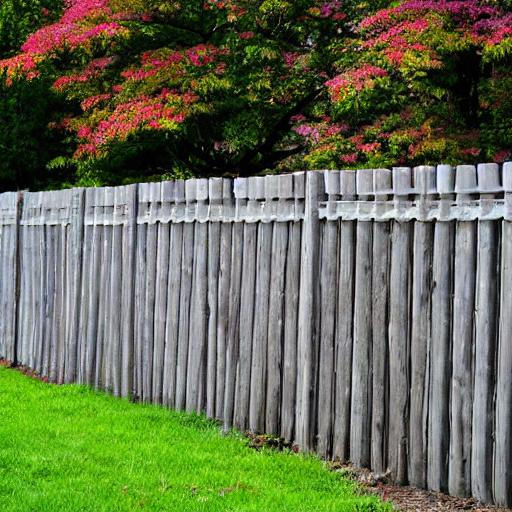
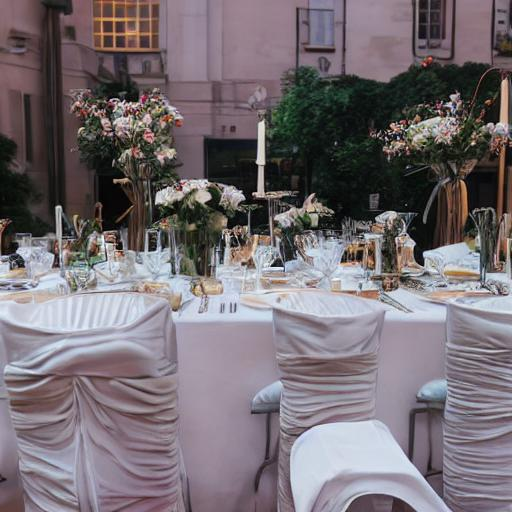
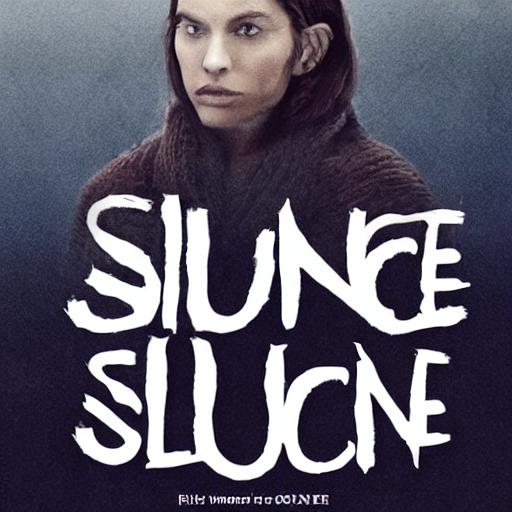
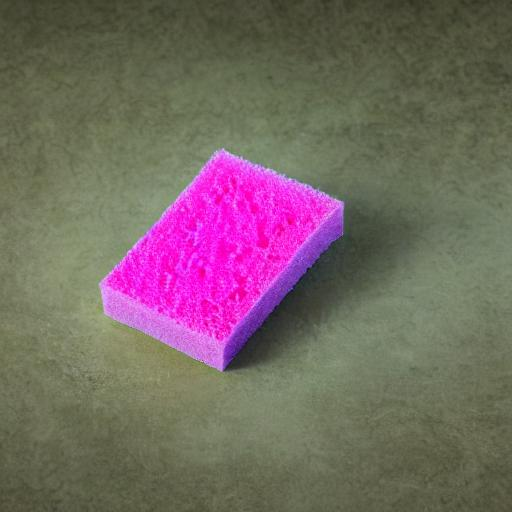

<IPython.core.display.Javascript object>

In [ ]:
import re
import base64
from IPython.display import display, HTML, Javascript, Image


html_content = open('index.html').read()
pattern = r"\".*\.jpg\""
image_path = re.findall(pattern,html_content)

for i in range(len(image_path)):


  i_cleaned = re.sub(r"[^\w\s]", ' ', image_name[i])
  i_cleaned = re.sub(r"The answer is",'',i_cleaned)
  i_cleaned = re.sub(r"Answer",'',i_cleaned)

  image_name[i] = f"{i_cleaned.replace(' ','')}.jpg"
  with open(image_name[i], "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    html_content = html_content.replace(image_path[i],f'"data:image/jpeg;base64,{encoded_image}"')


# Read the content of the JavaScript file
js_code = open('script.js').read()

# Display the HTML content
display(HTML(html_content))

# Execute the JavaScript code
display(Javascript(js_code))


#**Outcome:**

### The project showcases how the outputs from both ChatGPT and Stable Diffusion can be seamlessly integrated into a website (yes, provided you're using a good prompt!). With minimal preprocessing, such as segregating the output files, the original outputs from both models are preserved and transformed into a functional Riddles website. This successful integration highlights the potential of combining different AI models to create dynamic and interactive web applications without compromising the integrity of the generated content.